<a href="https://colab.research.google.com/github/marciadartup/Portif-lio/blob/master/Google_Drive_e_Snippets_do_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Google Drive e Google Colab

Estar dentro do ecossistema do Google tem suas vantagens. Além de estarmos utilizando um ambiente altamente interativo, prático, robusto e fácil de usar, também temos integração facilitada com outros produtos Google, como o Google Drive, por exemplo.


<center><img width="20%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Google_%22G%22_Logo.svg/1004px-Google_%22G%22_Logo.svg.png"></center>

Além disso, o Colab ainda pode nos ajudar com alguns exemplos de códigos e outros snippets que podem nos salvar muito tempo.

## Acessando o Google Drive a partir do Colab

O Google Drive é o sistema de armazenamento em nuvem do Google, e pode ser um grande facilitador do nosso trabalho no que tange acessibilidade aos arquivos que vamos trabalhar.

Usando o pacote `drive` da biblioteca `google.colab` conseguimos interagir com nosso drive de forma prática e simples. Tudo que precisamos fazer é montar o drive com o comando abaixo.

Após rodar a célula, abrirá uma nova janela, pedindo autorização para acessar a conta e manipular os arquivos contidos nela. Após liberar o acesso, copie o código gerado e insira-o abaixo.

In [5]:
# importando os pacotes necessários
from google.colab import drive

# montando o drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Pronto! Seu drive foi montado e está disponível para ser acessado. Você pode visualizá-lo na aba arquivos na lateral esquerda do navegador.

É possível usar a função `!ls` para listar os arquivos disponíveis dentro do nosso drive.

In [9]:
# listando arquivos
!ls 'gdrive/My Drive/'

'Arquivos Colab'      'Colab Notebooks'
'Arquivos Colab (1)'   lista_de_clientes.txt


Agora que temos acesso aos nossos arquivos, podemos manipulá-los.


In [12]:
# lendo o arquivo lista_de_clientes.txt
with open('/content/gdrive/My Drive/lista_de_clientes.txt', 'r') as clientes:
  print(clientes.read())

lista de clientes
arquivo novo
teste
teste


## Snippets do Colab

Além de todas as vantagens, e funcionalidades do Google Colab que já vimos, existe uma outra que também pode ser bastante útil em aplicações futuras, e demonstram o poder dessa plataforma.

Usando **Snippets** pré-criados e disponibilizados aqui dentro, podemos ganhar tempo e performance em nossos projetos.

Para acessar os snippets, clique na aba `insert`, no canto superior esquerdo do navegador, e depois clique em `Code Snippets`.

À esquerda, será aberta uma aba com várias opções de snippets para serem inseridos em nosso código.

Abaixo, veremos alguns exemplos e aplicações.

In [14]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

### Webcam

É possível acessar e tirar fotos de sua webcam com algumas linhas de código, inseridas automaticamente pelo Google Colab.

<IPython.core.display.Javascript object>

Saved to photo.jpg


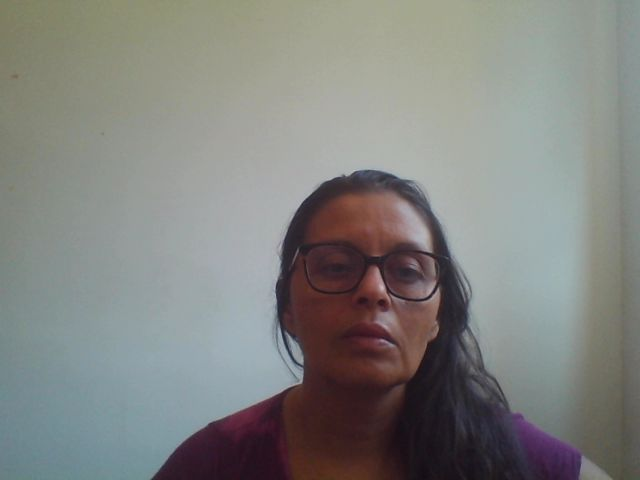

In [15]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

### Formulário

Você também pode se baser em um snippet do Colab para criar um formulário. 

Os formulários podem receber diversos tipos de dados, como podemos ver abaixo.

In [16]:
#@title Formulário Python na Prática
#@markdown Formulários suportam muitos tipos de dados.

Sem tipo específico = ''  #@param
Nome (String) = 'example'  #@param {type: "string"}
Idade (Slider de Valores) = 31  #@param {type: "slider", min: 18, max: 100}
Número (Integer) = 102  #@param {type: "number"}
Data = '2010-11-02'  #@param {type: "date"}
Drop Down = "wednesday"  #@param ['monday', 'tuesday', 'wednesday', 'thursday']
Selecione ou Acrescente = "apples" #@param ["apples", "bananas", "oranges"] {allow-input: true}
#@markdown ---


SyntaxError: ignored

### Gráficos

Você também pode tirar dos snippets ideias de visualização. Existem várias visualizaçõs pré-prontas disponíveis, utilizando diferentes bibliotecas.

Abaixo, vamos ver alguns exemplos:

#### Gráfico Interativo Para Preço de Ações

Utilizando a biblioteca de visualização de dados `Altair`, o Colab possui esse snippet para gráficos de açoes. O gráfico é interativo, e pode servir de inspiração para os seus.

In [17]:
from vega_datasets import data
stocks = data.stocks()

import altair as alt
alt.Chart(stocks).mark_line().encode(
  x='date:T',
  y='price',
  color='symbol'
).interactive(bind_y=False)

alt.Chart(...)

#### Consumo de Combustível por País de Fabricação dos Veículos

In [20]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

import altair as alt

points = alt.Chart(cars).mark_point().encode(
  x='Year:T',
  y='Miles_per_Gallon',
  color='Origin'
).properties(
  width=800
)

lines = alt.Chart(cars).mark_line().encode(
  x='Year:T',
  y='mean(Miles_per_Gallon)',
  color='Origin'
).properties(
  width=800
).interactive(bind_y=False)
              
points + lines

alt.LayerChart(...)

#### Consumo de Combustível x Potência em Cavalos

In [18]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

import altair as alt

interval = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

alt.Chart(...)